# **What is Image Classification?**

Image classification is the process of categorizing and labelling groups of pixels or vectors in an image according to specific rules. The categorization law can be designed using one or more spectral or textural characteristics.



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# In the dataset, each image is mapped into a single label. Since the class
# names are not defined in the dataset, we need to store them here so that we
# can use them later when viewing the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

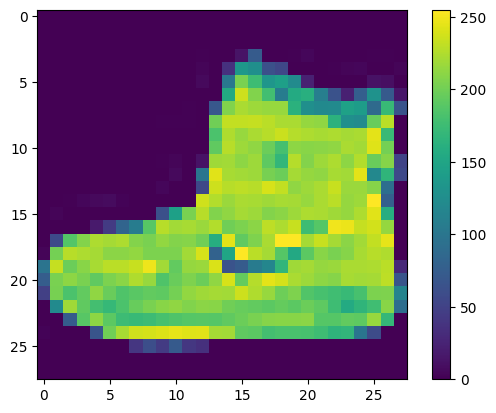

In [4]:
# the data must be preprocessed before training the neural network.
# If you inspect the first frame of the training set, you will find that the
# pixel values ​​are between 0 and 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Scale these values ​​to a range of 0 to 1 before passing them to the neural
# network model. To do this, we need to divide the values ​​by 255. The training
# set and the test set should be preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

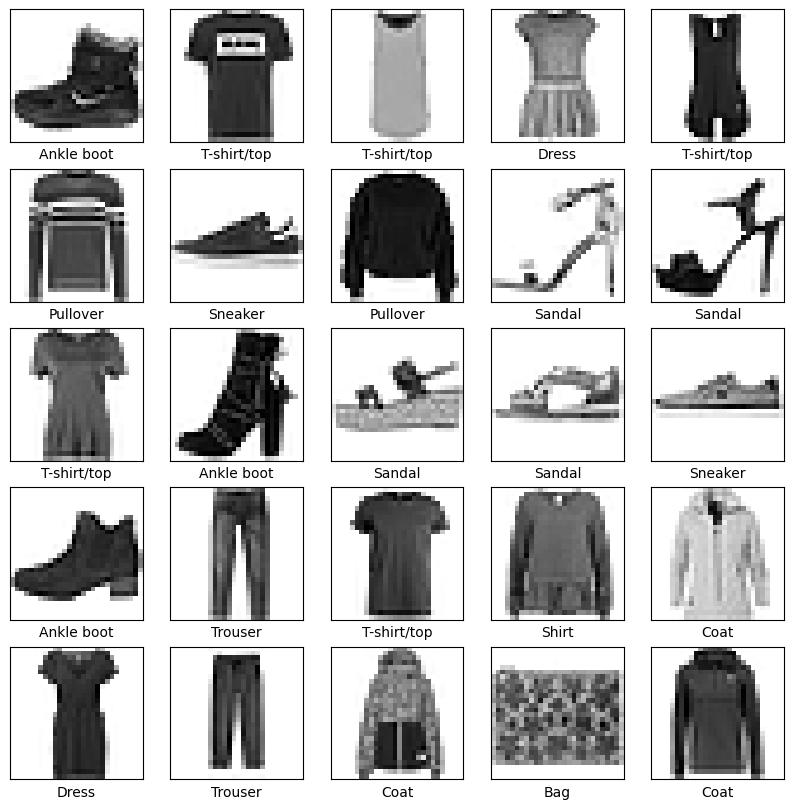

In [6]:
# Display the first 25 images of the training set and display the name of the
# class under each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# Create the layers of our neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [8]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5022 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3763 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3431 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3133 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2974 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2823 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2697 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2574 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2484 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

In [10]:
#Make Predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([5.8858951e-08, 2.5960452e-09, 4.3869863e-11, 3.0073805e-11,
       8.6441885e-09, 5.2326908e-03, 1.8011750e-07, 6.3974145e-03,
       1.9917842e-07, 9.8836935e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the “confidence” of the model that the image matches each of the 10 different garments. Let’s see which label has the highest confidence value

In [11]:
np.argmax(predictions[0])

9

The model is most convinced that this image is an ankle boot, or class_names [9]. Examination of the test label below shows that this classification is correct

In [12]:
test_labels[0]

9

In [13]:
# Create a helper function to plot our predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

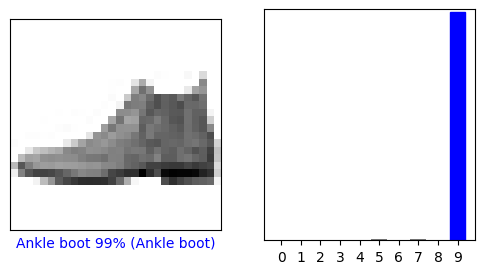

In [14]:
# Let’s look at the 0th frame of the predictions and the prediction table.
# The correct prediction labels are blue and the incorrect prediction labels
# are red
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

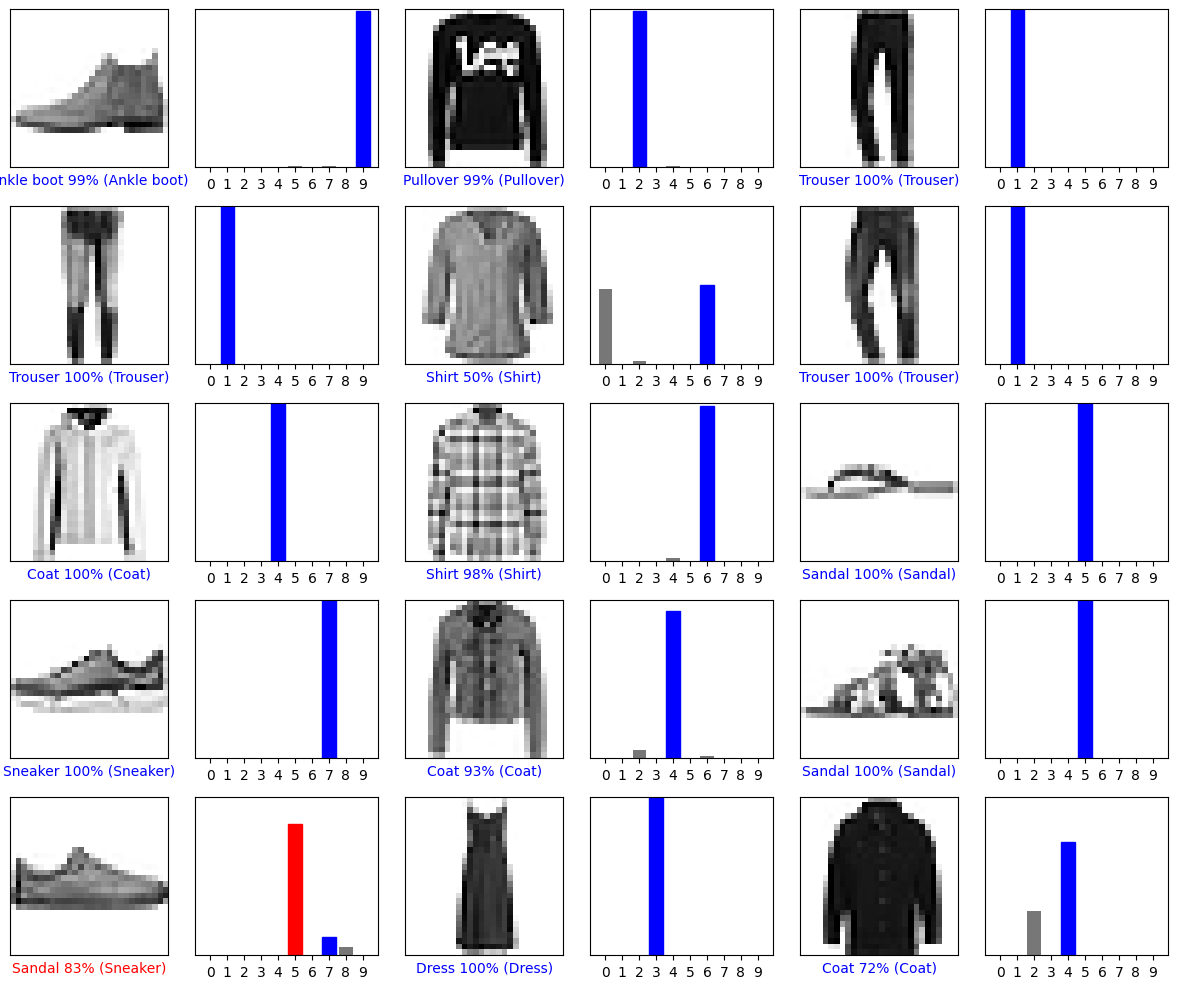

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Only the boots are recognized wrong as sandals